In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [37]:
# Load the Breast Cancer dataset using load_breast_cancer from sklearn.
data = load_breast_cancer()

In [ ]:
# Partition the data into an 80% training set and a 20% test set.
# store 30 features in a variable X and target values in a variable y
# split the data into train and test data with test ratio of 0.2, to ensure the result is the same for every call, set random_state to 42
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Scale the features using StandardScaler for KNN.
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
# Model training
# KNN classifier model -> initially n_neighbors=5, update n_neighbors
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(scaled_X_train, y_train)
KNN_pred = KNN.predict(scaled_X_test)

# Decision Tree model -> use default first, update max_depth
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

# Random Forest model -> start with 100 trees(n_estimators=100), update max_depth and min_samples_split
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

In [ ]:
# Evaluation steps
# Apply Accuracy, precision, recall, F1 score and confusion matrix for each model.

def evaluate_model(model_name, y_test, y_pred):
    # evaluations 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # show result
    print(f'{model_name} result:')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 score: {f1:.3f}')

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(f'Confusion Matrix of {model_name}')
    plt.show()

KNN result:
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1 score: 0.958


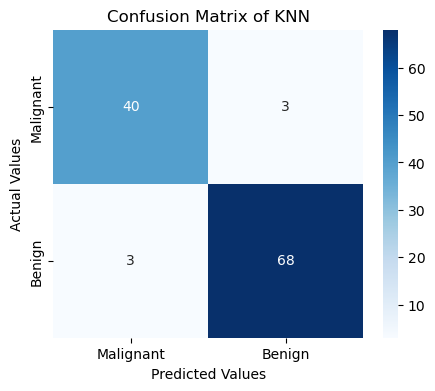

Decision Tree result:
Accuracy: 0.939
Precision: 0.957
Recall: 0.944
F1 score: 0.950


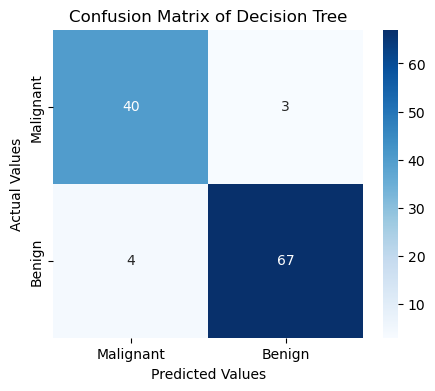

Random Forest result:
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1 score: 0.972


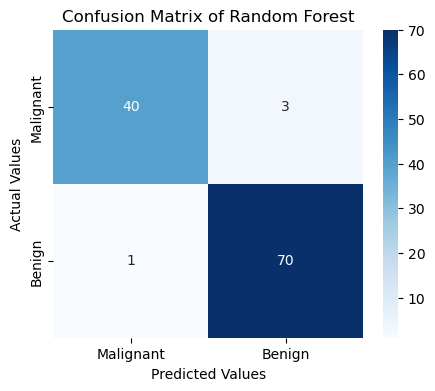

In [42]:
evaluate_model('KNN', y_test, KNN_pred)
evaluate_model('Decision Tree', y_test, DT_pred)
evaluate_model('Random Forest', y_test, RF_pred)

In [43]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
# define the lists of hyperparameters for each model
KNN_neighbors = [3, 5, 7, 10, 20]
DT_depth = [1, 3, 5, 8, 10]
RF_depth = [1, 3, 5, 8, 10]

KNN with 3 neighbors result:
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1 score: 0.958


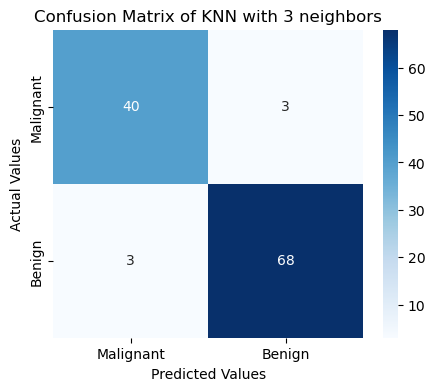

Decision Tree with max_depth 1 result:
Accuracy: 0.895
Precision: 0.940
Recall: 0.887
F1 score: 0.913


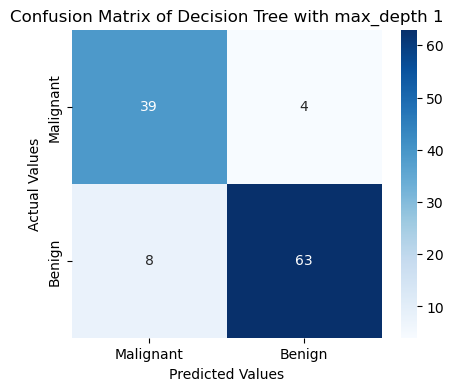

Random Forest with max_depth 1 result:
Accuracy: 0.956
Precision: 0.934
Recall: 1.000
F1 score: 0.966


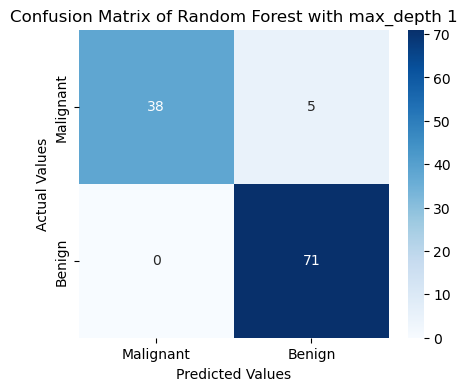

KNN with 5 neighbors result:
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1 score: 0.958


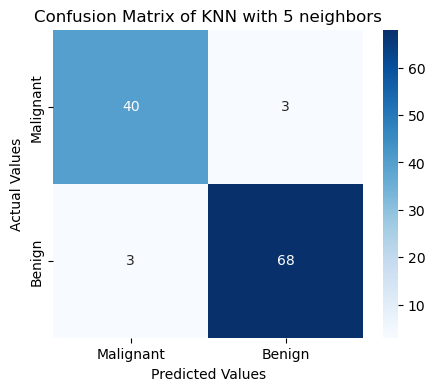

Decision Tree with max_depth 3 result:
Accuracy: 0.939
Precision: 0.944
Recall: 0.958
F1 score: 0.951


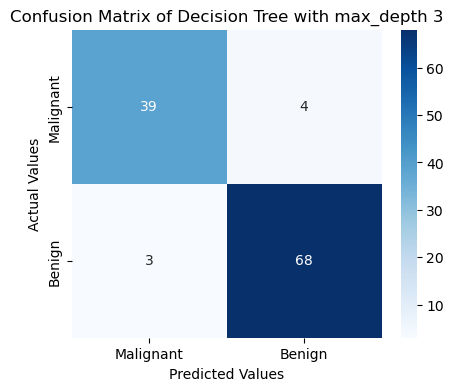

Random Forest with max_depth 3 result:
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1 score: 0.972


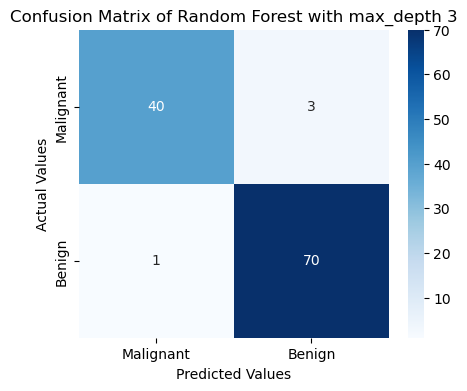

KNN with 7 neighbors result:
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1 score: 0.958


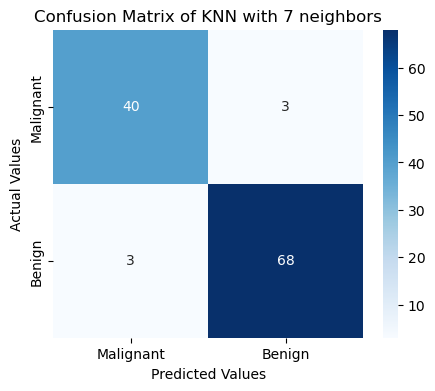

Decision Tree with max_depth 5 result:
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1 score: 0.958


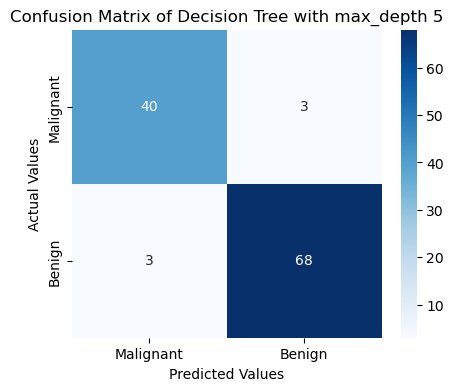

Random Forest with max_depth 5 result:
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1 score: 0.972


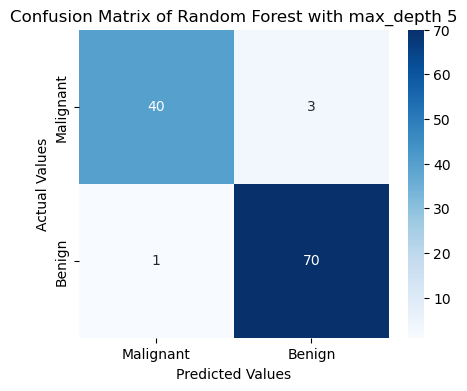

KNN with 10 neighbors result:
Accuracy: 0.956
Precision: 0.971
Recall: 0.958
F1 score: 0.965


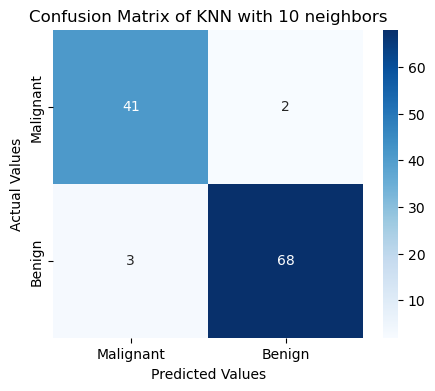

Decision Tree with max_depth 8 result:
Accuracy: 0.939
Precision: 0.944
Recall: 0.958
F1 score: 0.951


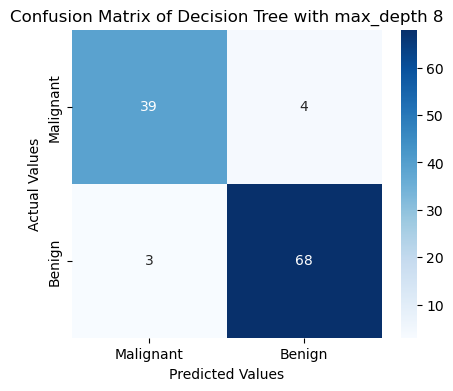

Random Forest with max_depth 8 result:
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1 score: 0.972


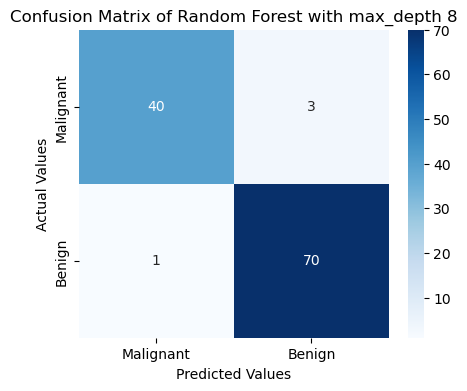

KNN with 20 neighbors result:
Accuracy: 0.956
Precision: 0.958
Recall: 0.972
F1 score: 0.965


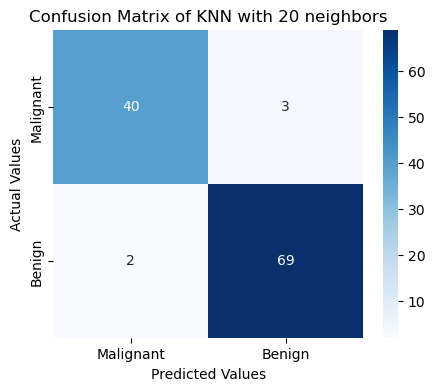

Decision Tree with max_depth 10 result:
Accuracy: 0.939
Precision: 0.944
Recall: 0.958
F1 score: 0.951


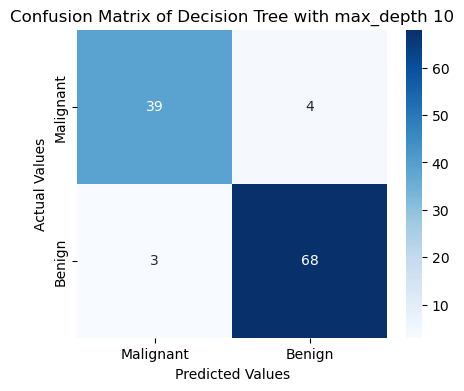

Random Forest with max_depth 10 result:
Accuracy: 0.956
Precision: 0.958
Recall: 0.972
F1 score: 0.965


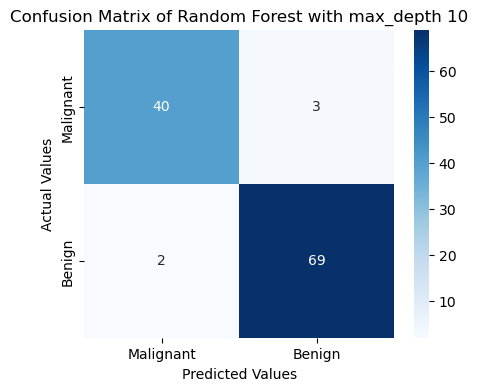

In [46]:
for i in range(len(KNN_neighbors)):
    # tuning hyperparameter for each model
    KNN_opt = KNeighborsClassifier(n_neighbors=KNN_neighbors[i])
    DT_opt = DecisionTreeClassifier(max_depth=DT_depth[i])
    RF_opt = RandomForestClassifier(n_estimators=100, max_depth=RF_depth[i])

    # train each model
    KNN_opt.fit(scaled_X_train, y_train)
    DT_opt.fit(X_train, y_train)
    RF_opt.fit(X_train, y_train)

    # get predictions from each model
    KNN_opt_pred = KNN_opt.predict(scaled_X_test)
    DT_opt_pred = DT_opt.predict(X_test)
    RF_opt_pred = RF_opt.predict(X_test)

    # use pre-defined evaluation function for each model
    evaluate_model(f'KNN with {KNN_neighbors[i]} neighbors', y_test, KNN_opt_pred)
    evaluate_model(f'Decision Tree with max_depth {DT_depth[i]}', y_test, DT_opt_pred)
    evaluate_model(f'Random Forest with max_depth {RF_depth[i]}', y_test, RF_opt_pred)